In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

 
df = pd.read_csv('electricity.csv')

# 


In [2]:
df

,unique_id,ds,y,Exogenous1,Exogenous2
0,BE,10/22/2016 0:00,70.000000,49593.0,57253.0
1,BE,10/22/2016 1:00,37.100000,46073.0,51887.0
2,BE,10/22/2016 2:00,37.100000,44927.0,51896.0
3,BE,10/22/2016 3:00,44.750000,44483.0,48428.0
4,BE,10/22/2016 4:00,37.100000,44338.0,46721.0
...,...,...,...,...,...
8395,PJM,12/23/2018 19:00,32.461970,98288.0,11711.0
8396,PJM,12/23/2018 20:00,32.052179,97194.0,11637.0
8397,PJM,12/23/2018 21:00,27.632347,94319.0,11433.0
8398,PJM,12/23/2018 22:00,24.746053,90106.0,11108.0


In [3]:
df.unique_id.value_counts()

BE     1680
DE     1680
FR     1680
NP     1680
PJM    1680
Name: unique_id, dtype: int64

In [4]:
df = df[df['unique_id'] == "DE"]
df

,unique_id,ds,y,Exogenous1,Exogenous2
1680,DE,10/22/2017 0:00,19.10,587.25,16972.75
1681,DE,10/22/2017 1:00,19.03,623.00,16254.50
1682,DE,10/22/2017 2:00,16.90,650.00,15940.25
1683,DE,10/22/2017 3:00,12.98,687.25,15959.50
1684,DE,10/22/2017 4:00,9.24,717.25,16071.50
...,...,...,...,...,...
3355,DE,12/30/2017 19:00,16.18,1519.50,19326.00
3356,DE,12/30/2017 20:00,11.13,1526.75,18135.25
3357,DE,12/30/2017 21:00,4.62,1514.75,17631.50
3358,DE,12/30/2017 22:00,4.71,1484.75,17553.75


In [5]:
df['ds'] = pd.to_datetime(df['ds'])
data = df[['y', 'Exogenous1', 'Exogenous2']].values

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

 
X = data[:, 1:]   
y = data[:, 0]   


C:\Users\ninja\AppData\Local\Temp\ipykernel_17400\599799455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [6]:
def create_sequences(X, y, seq_length):
    sequences = []
    labels = []
    for i in range(len(X) - seq_length):
        sequences.append(X[i:i+seq_length])
        labels.append(y[i+seq_length])
    return torch.FloatTensor(sequences), torch.FloatTensor(labels)

seq_length = 3# 24 saatlik geçmiş veriyi kullanarak tahmin yapalım
X_seq, y_seq = create_sequences(X, y, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, shuffle=False)


C:\Users\ninja\AppData\Local\Temp\ipykernel_17400\3235464680.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  return torch.FloatTensor(sequences), torch.FloatTensor(labels)


In [7]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [8]:
for x,y in train_loader:
    print(x.shape)
    print(y.shape)

torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class Conv1DForecastingModel(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(Conv1DForecastingModel, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=2)
    
        self.fc1 = nn.Linear(32 * 1, 16)  # 32 filtre ile 1 zaman adımı kalır (conv katmanlarından sonra)
        self.fc2 = nn.Linear(16, output_channels)  
        
    def forward(self, x):
        # x: (batch_size, seq_length, input_channels) → (batch_size, input_channels, seq_length)

        x = x.permute(0, 2, 1)  
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1) 
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  
        
        return x


In [12]:
input_channels = 2 
output_channels = 1   
model = Conv1DForecastingModel(input_channels, output_channels)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Conv1DForecastingModel(
  (conv1): Conv1d(2, 16, kernel_size=(2,), stride=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

In [14]:
X_train, y_train = X_train.to(device), y_train.to(device)
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train)  
    outputs = outputs.squeeze()  
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Eğitim tamamlandı")



Epoch [1/10000], Loss: 0.3868
Epoch [2/10000], Loss: 0.3772
Epoch [3/10000], Loss: 0.3676
Epoch [4/10000], Loss: 0.3577
Epoch [5/10000], Loss: 0.3474
Epoch [6/10000], Loss: 0.3369
Epoch [7/10000], Loss: 0.3263
Epoch [8/10000], Loss: 0.3156
Epoch [9/10000], Loss: 0.3049
Epoch [10/10000], Loss: 0.2943
Epoch [11/10000], Loss: 0.2839
Epoch [12/10000], Loss: 0.2737
Epoch [13/10000], Loss: 0.2636
Epoch [14/10000], Loss: 0.2537
Epoch [15/10000], Loss: 0.2440
Epoch [16/10000], Loss: 0.2345
Epoch [17/10000], Loss: 0.2249
Epoch [18/10000], Loss: 0.2151
Epoch [19/10000], Loss: 0.2051
Epoch [20/10000], Loss: 0.1948
Epoch [21/10000], Loss: 0.1844
Epoch [22/10000], Loss: 0.1738
Epoch [23/10000], Loss: 0.1629
Epoch [24/10000], Loss: 0.1519
Epoch [25/10000], Loss: 0.1407
Epoch [26/10000], Loss: 0.1295
Epoch [27/10000], Loss: 0.1186
Epoch [28/10000], Loss: 0.1080
Epoch [29/10000], Loss: 0.0978
Epoch [30/10000], Loss: 0.0880
Epoch [31/10000], Loss: 0.0788
Epoch [32/10000], Loss: 0.0703
Epoch [33/10000],

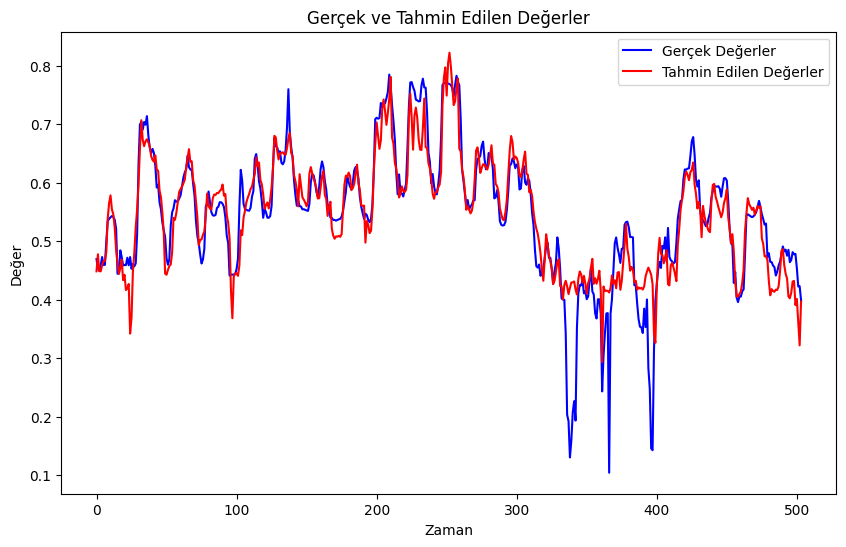

In [15]:
import torch
import matplotlib.pyplot as plt

X_test = X_test.to(device)
y_test = y_test.to(device)
model.eval()

with torch.no_grad():
    test_outputs = model(X_test).squeeze() 
    test_outputs = test_outputs.cpu().numpy()  
    y_test_np = y_test.cpu().numpy()  


plt.figure(figsize=(10,6))
plt.plot(y_test_np, label='Gerçek Değerler', color='b')
plt.plot(test_outputs, label='Tahmin Edilen Değerler', color='r')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman')
plt.ylabel('Değer')
plt.legend()
plt.show()
